### Assignment_Multi_Linear_Regression_50_startup

In [1]:
# importing requried libraries
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stat
from statsmodels.graphics.regressionplots import influence_plot
from sklearn import linear_model
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\PRASAD\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# load dataset
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.shape

(50, 5)

###  Performing EDA On Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data = data.drop('State', axis = 1)
# State is a Categorical feature we need to do some encoding or convert it into numerical values by putting dummy values

In [6]:
# Renaming the columns name to make it short
df=data.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"Profit":'profit'},axis=1)
df.head()

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
# Checking for Null Values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
# Checking for Duplicate Values
data[data.duplicated()].shape

(0, 4)

In [10]:
data.corr()   #Correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


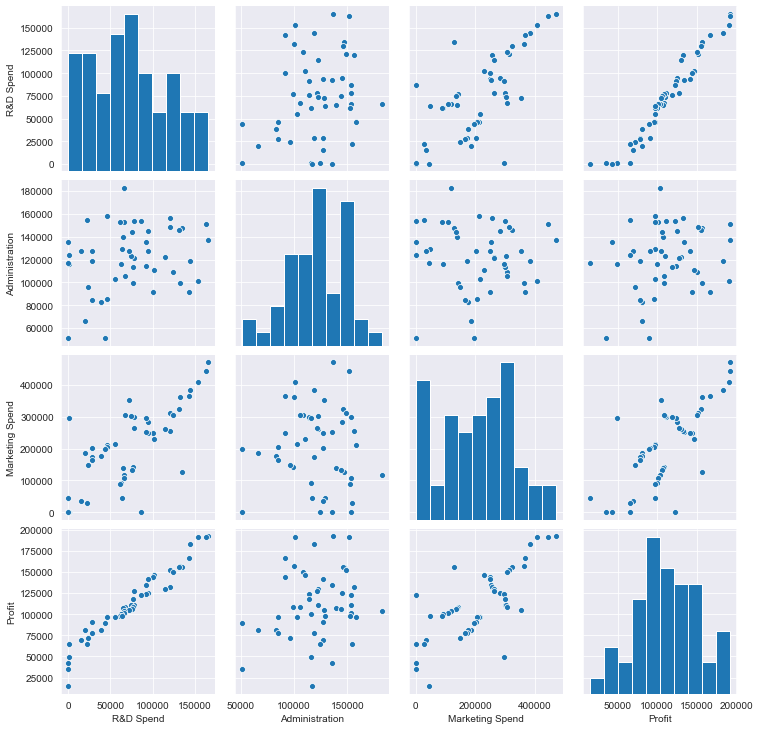

In [11]:
sns.set_style(style='darkgrid')  #Pair plot
sns.pairplot(data)

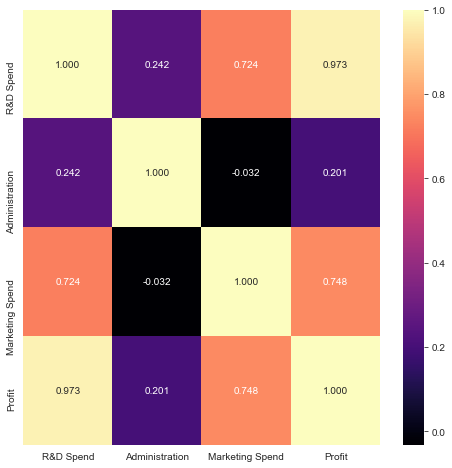

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='magma', annot=True, fmt=".3f")   #Heatmap fmt=".no. of decimals" 

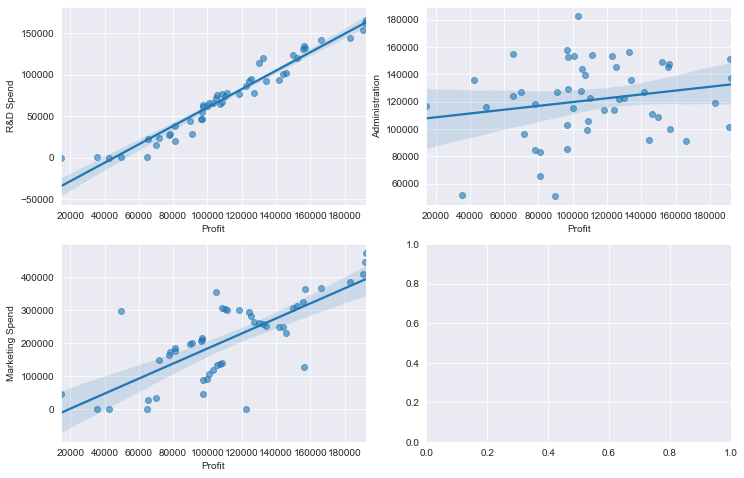

In [13]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Profit', y = 'R&D Spend', data = data, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Profit', y = 'Administration', data = data, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Profit', y = 'Marketing Spend', data = data, scatter_kws={'alpha':0.6}, ax = axes[1,0])

### Model Building

#### Using Sklearn

In [14]:
X = data.drop(['Profit'], axis = 1).values        
y = data.iloc[:, 3].values.reshape(-1,1)
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [15]:
model = linear_model.LinearRegression() 
model.fit(X,y)

LinearRegression()

In [16]:
model.rank_

3

In [17]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [18]:
model.intercept_

array([50122.19298987])

In [19]:
r2_score(y,model.predict(X))

0.9507459940683246

### Prediction

In [20]:
startup_new =pd.DataFrame({"R&D Spend":152200,"Administration":155300,"Marketing Spend":472000},index=[1]) 
model.predict(startup_new)
print("The profit will be:",model.predict(startup_new)) 

The profit will be: [[181439.15028132]]


### Using stats.ols

In [21]:
import statsmodels.formula.api as sm

model = sm.ols("profit~RnD+admin+marketing", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        22:59:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test for Normality of Residuals (Q-Q Plot)

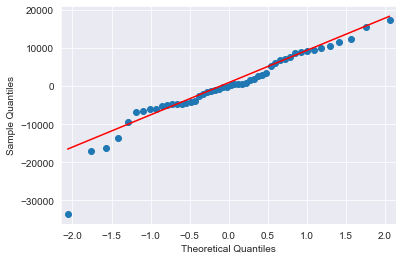

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line

#### Residual Plot for Homoscedasticity

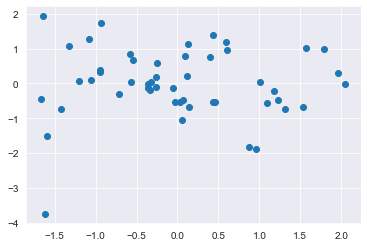

In [23]:
def std( vals ):                      #Loop created for return values.
    return (vals - vals.mean())/vals.std()

plt.scatter(std(model.fittedvalues),
            std(model.resid))

#### Residual Vs Regressors

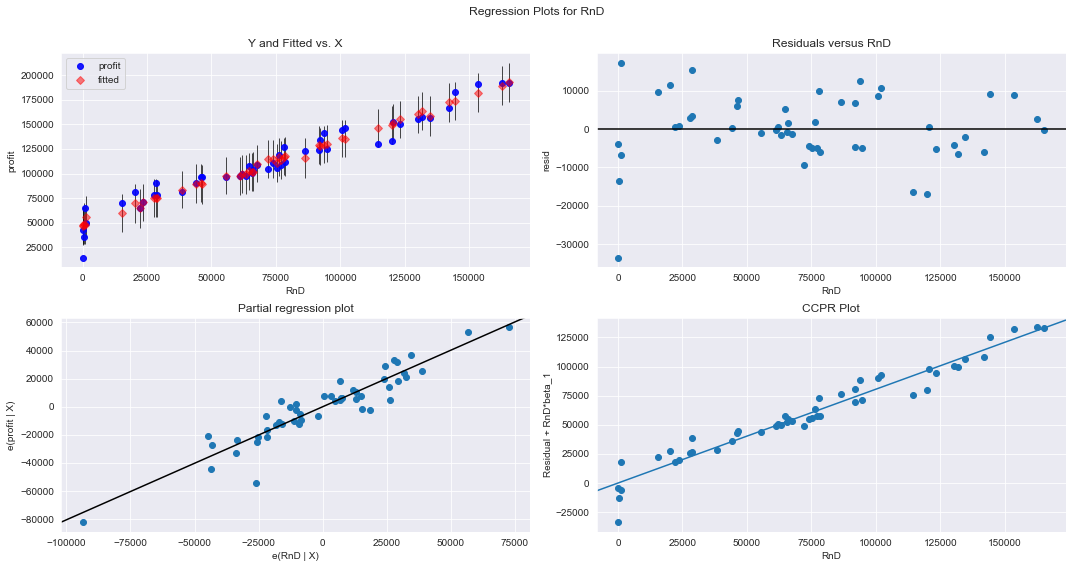

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD", fig=fig)
plt.show()

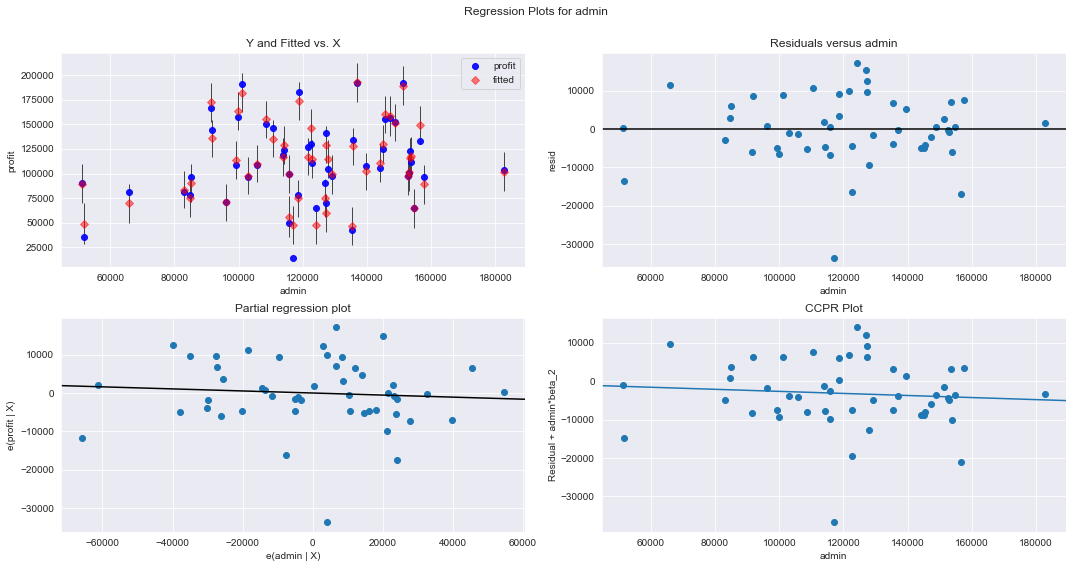

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()

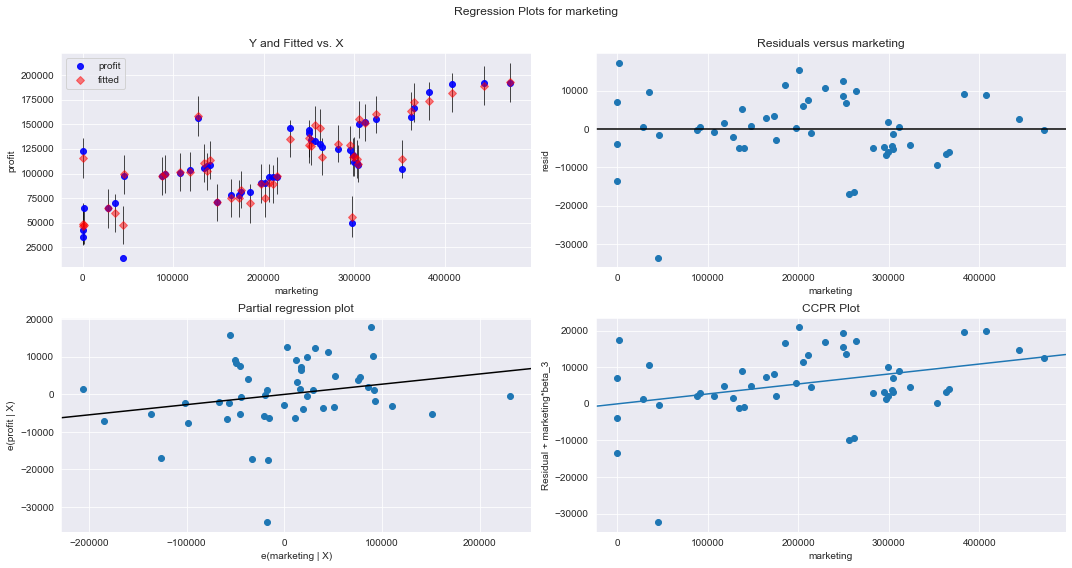

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "marketing", fig=fig)
plt.show()

#### Detecting Influencers/Outliers

In [27]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

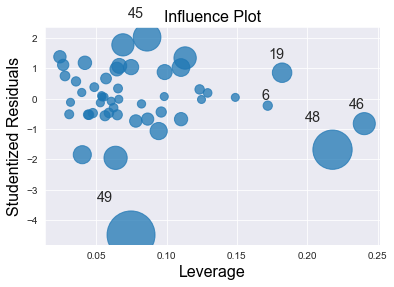

In [28]:
influence_plot(model)
plt.show()

In [29]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543264)

In [30]:
(model.rsquared,model.aic)

(0.9507459940683246, 1058.7714985998055)

In [31]:
model.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

### Actual Vs Predicted Graph

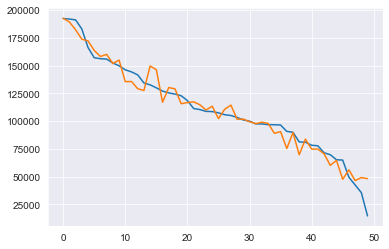

In [32]:
#Comparing original Data's Scatterlot with regressed model
plt.plot(data.Profit)
plt.plot(model.predict(df))      
plt.show()

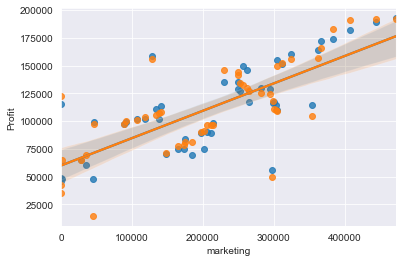

In [33]:
sns.regplot(df.marketing,model.predict(df))
sns.regplot(df.marketing,data.Profit)
plt.show()

### Inference: Y = 50122.2 +0.80571505X1 -0.02681597X2 +0.02722806X3 is best suited model.